In [1]:
import PyComplexHeatmap as pch
import pandas as pd
from pathlib import Path
import re
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import muon as mu

2024-02-02 21:51:30.029985: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-02 21:51:30.777273: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
trajMap=mu.read_h5mu("../../important_processed_data/12.30_trajMap.h5mu")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [3]:
coorDf=pd.read_csv("../processed_data/24.1.20_trajdiff_dotplot/24.1.20_coorSelect.csv",index_col=0)
peakDf=pd.read_csv("../processed_data/24.1.20_trajdiff_dotplot/24.1.20_peakSelect.csv",index_col=0)
exprDf=pd.read_csv("../processed_data/24.1.20_trajdiff_dotplot/24.1.20_exprSelect.csv",index_col=0)

In [4]:
coorDf_sqrt = np.where(coorDf >= 0, np.sqrt(coorDf), -np.sqrt(-coorDf))
coorDf_sqrt=pd.DataFrame(coorDf_sqrt)
coorDf_sqrt.columns=coorDf.columns
coorDf_sqrt.index=coorDf.index

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


In [36]:
scaled_df2 = exprDf.apply(lambda row: (row) / (row.max()), axis=1)

In [5]:
# Function to row scale using Z-score
def row_scale(row):
    return (row - row.mean()) / row.std()

# Apply the row scaling function to each row
scaled_df = exprDf.apply(row_scale, axis=1)
coorDf_scale=coorDf_sqrt.apply(row_scale, axis=1)

In [6]:
meta=pd.read_csv("../../important_processed_data/10.26_wt_integrate_meta.csv",index_col=0)

/tmp/ipykernel_2341511/3263988146.py:1: DtypeWarning: Columns (12,17,18,19,21,22,23,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  meta=pd.read_csv("../../important_processed_data/10.26_wt_integrate_meta.csv",index_col=0)


In [75]:
sampleDf2=meta[["Sample","Project","Age"]][meta["Sample"].isin(coorDf.columns)].drop_duplicates()

In [16]:
sampleDf2["Age"][~sampleDf2["Age"].isin(["Postnatal","Young Adult"])]

Ablation_Matsushita_abl7con1_AAACCTGCAAAGGCGT-1_2-0-2        Adult
Ablation_Matsushita_abl7con2_AAACCCAAGCATAGGC-1_3-0-2        Adult
Bmsc2019_Regev_samp1_baryawno:std1_AAACCTGAGAAGGGTA-0-2      Adult
Bmsc2019_Regev_samp2_baryawno:std2_AAACGGGAGCCTTGAT-0-2      Adult
Bmsc2019_Regev_samp3_baryawno:std3_AAACCTGCACTAAGTC-0-2      Adult
Bmsc2019_Regev_samp4_baryawno:std4_AAACGGGAGTATCTCG-0-2      Adult
Bmsc2019_Regev_samp5_baryawno:std7_AAACGGGTCACAATGC-0-2      Adult
Bmsc2019_Regev_samp6_baryawno:std8_AAAGCAATCAAACAAG-0-2      Adult
Bmsc2019_Regev_b1_AAACCTGAGTAGCGGT-1_1-0-2                   Adult
Bmsc2019_Regev_b4_AAACCTGCAATACGCT-1_4-0-2                   Adult
Bmsc2019_Regev_bm1_AAACCTGAGTTCGATC-1_1-0-2                  Adult
Bmsc2019_Regev_bm2_AAACCTGAGTACGTAA-1_2-0-2                  Adult
Bmsc2019_Regev_bm3_AAACCTGTCGTTTAGG-1_3-0-2                  Adult
Bmsc2019_Regev_bm4_AAACCTGTCAGCACAT-1_4-0-2                  Adult
BmscChondro_Long_AAACCCAAGCAGCAGT-0-2                        A

In [76]:
sampleDf2["Age"][~sampleDf2["Age"].isin(["Postnatal","Young Adult"])]="Adult"
sampleDf2["Age"][sampleDf2["Age"].isin(["Postnatal","Young Adult"])]="Young"


In [18]:
goSelect=pd.read_csv("../processed_data/24.2.2_fig4_replot/selectCk.csv",index_col=0)

In [21]:
goSelect.shape

(34, 11)

In [156]:
goSelect

,Cluster,ONTOLOGY,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
1,Up_Up,CC,GO:0062023,collagen-containing extracellular matrix,63/334,396/28573,2.052191e-52,49.151224,5.875747e-50,Fmod/Clec14a/Col3a1/Ptn/Vcan/Matn1/Acan/Col9a3...,63
2,Up_0,CC,GO:0062023,collagen-containing extracellular matrix,12/335,396/28573,2.674096e-03,1.684516,1.482467e-02,Col13a1/Comp/Snorc/F13a1/Fbln2/Megf6/Nav2/Col6...,12
3,Down_Down,CC,GO:0062023,collagen-containing extracellular matrix,29/427,396/28573,2.535573e-12,9.025381,7.606720e-10,Ogn/Thbs4/Adamts5/Spock2/Plscr2/F3/Entpd2/Fbln...,29
4,Down_0,CC,GO:0062023,collagen-containing extracellular matrix,27/466,396/28573,5.187099e-10,6.686285,1.627111e-07,Slit2/Angptl7/Col8a2/Kng2/Cilp/Fgl2/Bmper/Thbs...,27
5,Up_Down,CC,GO:0062023,collagen-containing extracellular matrix,5/27,396/28573,3.130602e-05,2.771978,1.515871e-03,Postn/Angptl4/Ptprz1/Npnt/Matn4,5
6,Up_Up,MF,GO:0005201,extracellular matrix structural constituent,31/327,145/28407,2.217478e-30,26.902092,1.059721e-27,Col3a1/Vcan/Col9a3/Col9a2/Col10a1/Col9a1/Hapln...,31
7,Down_Down,MF,GO:0005201,extracellular matrix structural constituent,12/419,145/28407,1.753094e-06,4.349640,3.532911e-05,Ogn/Thbs4/Spock2/Fbln5/Vwa1/Emilin2/Efemp1/Col...,12
8,Down_0,MF,GO:0005201,extracellular matrix structural constituent,12/454,145/28407,3.993292e-06,3.399290,3.152599e-04,Slit2/Col8a2/Bmper/Thbs1/Lama5/Vtn/Prelp/Ecm1/...,12
9,Up_Down,MF,GO:0005201,extracellular matrix structural constituent,3/26,145/28407,3.107273e-04,2.122264,4.498135e-03,Postn/Npnt/Matn4,3
10,Up_0,CC,GO:0000502,proteasome complex,13/335,65/28573,5.953973e-13,9.631907,1.673380e-10,Ecpas/Adrm1/Psmc2/Psmd2/Psma2/Psmb4/Psma4/Psmc...,13


In [170]:
goSelect.loc[[6,10,12,29,16,22,28,32]]

,Cluster,ONTOLOGY,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
6,Up_Up,MF,GO:0005201,extracellular matrix structural constituent,31/327,145/28407,2.217478e-30,26.902092,1.059721e-27,Col3a1/Vcan/Col9a3/Col9a2/Col10a1/Col9a1/Hapln...,31
10,Up_0,CC,GO:0000502,proteasome complex,13/335,65/28573,5.953973e-13,9.631907,1.673380e-10,Ecpas/Adrm1/Psmc2/Psmd2/Psma2/Psmb4/Psma4/Psmc...,13
12,0_Up,CC,GO:0008250,oligosaccharyltransferase complex,3/86,14/28573,9.355392e-06,2.757096,1.290059e-03,Rpn2/Dad1/Ostc,3
29,Up_Down,MF,GO:0005179,hormone activity,4/26,139/28407,7.548063e-06,3.203086,3.734305e-04,Bglap2/Bglap/Stc2/Agt,4
16,Down_Down,BP,GO:0007159,leukocyte cell-cell adhesion,33/422,447/28891,3.144909e-14,10.184329,4.296939e-11,Pla2g5/H2-Ab1/Smad7/Zc3h12a/Hspb1/Tmem131l/Rip...,33
22,Down_0,BP,GO:0001667,ameboidal-type cell migration,33/465,471/28891,1.997241e-12,8.207982,4.197463e-09,Hmox1/Slit2/Mmp12/Aqp1/P2rx4/Lrg1/Rgcc/Bmper/T...,33
28,0_Down,MF,GO:0019955,cytokine binding,6/94,145/28407,8.971654e-06,2.923276,9.821600e-04,Lifr/Itgb3/Ghr/Ackr4/Scube3/Lrrc32,6
32,Down_Up,BP,GO:0071604,transforming growth factor beta production,3/34,42/28891,1.656577e-05,2.106113,4.686460e-03,Itgb8/Cx3cl1/Fbln1,3


In [28]:
genelist_upup=goSelect.loc[6,"geneID"].split("/")
genelist_up0=goSelect.loc[10,"geneID"].split("/")
genelist_0up=goSelect.loc[12,"geneID"].split("/")
genelist_updown=goSelect.loc[29,"geneID"].split("/")
genelist_downdown=goSelect.loc[16,"geneID"].split("/")
genelist_down0=goSelect.loc[22,"geneID"].split("/")
genelist_0down=goSelect.loc[28,"geneID"].split("/")
genelist_downup=goSelect.loc[32,"geneID"].split("/")

### select genes

In [157]:
genelist=[genelist_upup,genelist_up0,
          genelist_0up,genelist_updown,
          genelist_downdown,genelist_down0,
         genelist_0down,genelist_downup]

In [131]:
genelist = [sublist[:8] if len(sublist) >= 5 else sublist for sublist in genelist]

In [158]:
genelist_flat = [item for sublist in genelist for item in sublist]


In [159]:
geneCatName=["Up_Up","Up_0","0_Up","Up_Down","Down_Down","Down_0","0_Down","Down_Up"]

In [160]:
geneDfLoopList=[]
for i in range(8):
    geneDfLoop=pd.DataFrame(genelist[i])
    geneDfLoop["category"]=geneCatName[i]
    geneDfLoop=geneDfLoop.set_index(0)
    geneDfLoopList.append(geneDfLoop)

In [161]:
geneSum=pd.concat(geneDfLoopList,axis=0)

In [162]:
def makeLong(gene):
    selectCoor=coorDf_scale.loc[gene]
    selectExpr=scaled_df2.loc[gene]
    selectPeak=peakDf.loc[gene]
    coorLong=selectCoor.stack().reset_index(name="Coor")
    exprLong=selectExpr.stack().reset_index(name="Expr")
    peakLong=selectPeak.stack().reset_index(name="Peak")
    peakLong['Stage']=peakLong.Peak.apply(lambda x:'End' if x>=7 else 'Middle' if x >= 3 else 'Start')
    combineDf=coorLong
    combineDf["Expr"]=exprLong['Expr']
    combineDf["Peak"]=peakLong['Stage']
    return(combineDf)

In [163]:
geneDf=makeLong(genelist_flat)

In [164]:
col_ha = pch.HeatmapAnnotation(
                           Age=pch.anno_simple(sampleDf2.Age,cmap='Set1',legend=True,add_text=False),
                            Project=pch.anno_simple(sampleDf2.Project,cmap='Set2',legend=True,add_text=False),
                           verbose=0,label_side='left',label_kws={'horizontalalignment':'right'})

In [165]:
row_ha = pch.HeatmapAnnotation(Row=pch.anno_simple(geneSum.category,cmap='Set3',
                                           add_text=True,text_kws={'color':'black','rotation':-90,'fontweight':'bold','fontsize':10,},
                                          legend=False),
                           axis=0,verbose=0,label_kws={'rotation':45,'horizontalalignment':'left'})

In [166]:
sampleDf2.index=sampleDf2["Sample"]

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..
Estimated legend width: 64.9125 mm


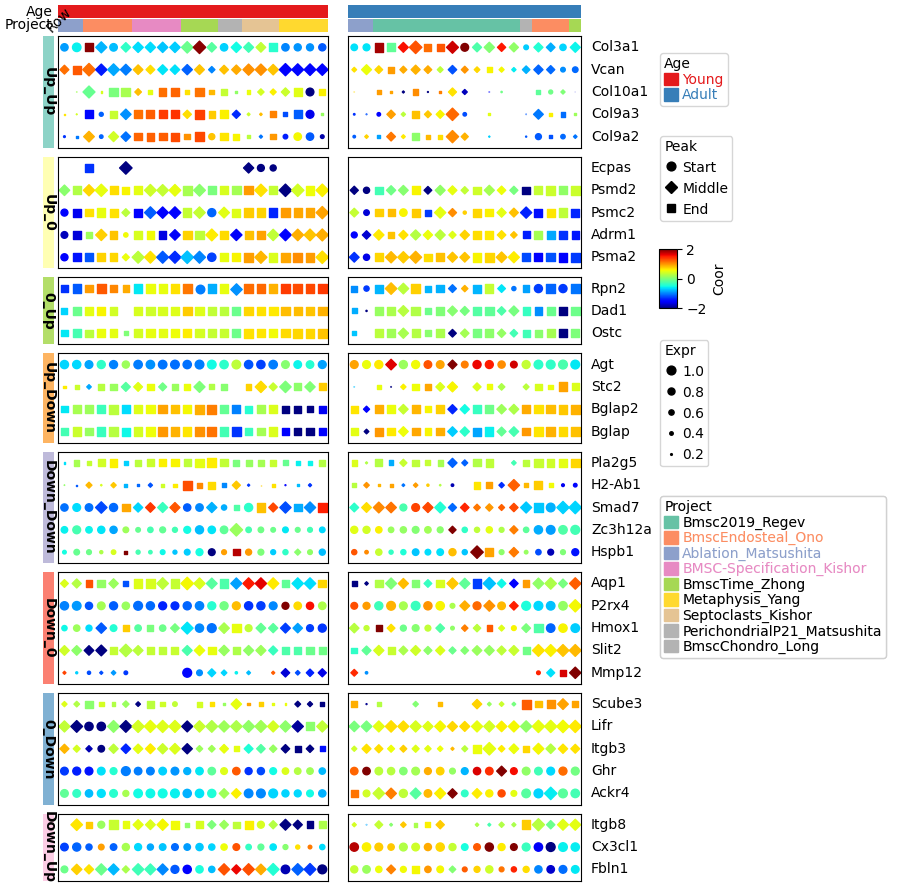

In [154]:
plt.figure(figsize=(7,10))
cm = pch.DotClustermapPlotter(geneDf,x='level_1',y='level_0',value='Coor',c='Coor',hue='Peak',s="Expr",
                              marker={'Start':'o','Middle':'D','End':'s'},row_dendrogram=False,vmax=2,vmin=-2,
                              col_split_gap=5, col_split=sampleDf2.Age,row_split=geneSum.category,
                              top_annotation=col_ha,col_cluster=False,row_split_gap=2,ratio=40,left_annotation=row_ha,
                              row_split_order=["Up_Up","Up_0","0_Up","Up_Down","Down_Down","Down_0","0_Down","Down_Up"],
                              col_split_order=["Young","Adult"],
                              show_rownames=True,show_colnames=False,spines=True)
plt.savefig("../result/24.2.2_fig4_replot/dotplot.pdf")

plt.show()


Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..


/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/PyComplexHeatmap/clustermap.py:836: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/PyComplexHeatmap/clustermap.py:836: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/PyComplexHeatmap/clustermap.py:836: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Plotting legends..
Estimated legend width: 64.9125 mm


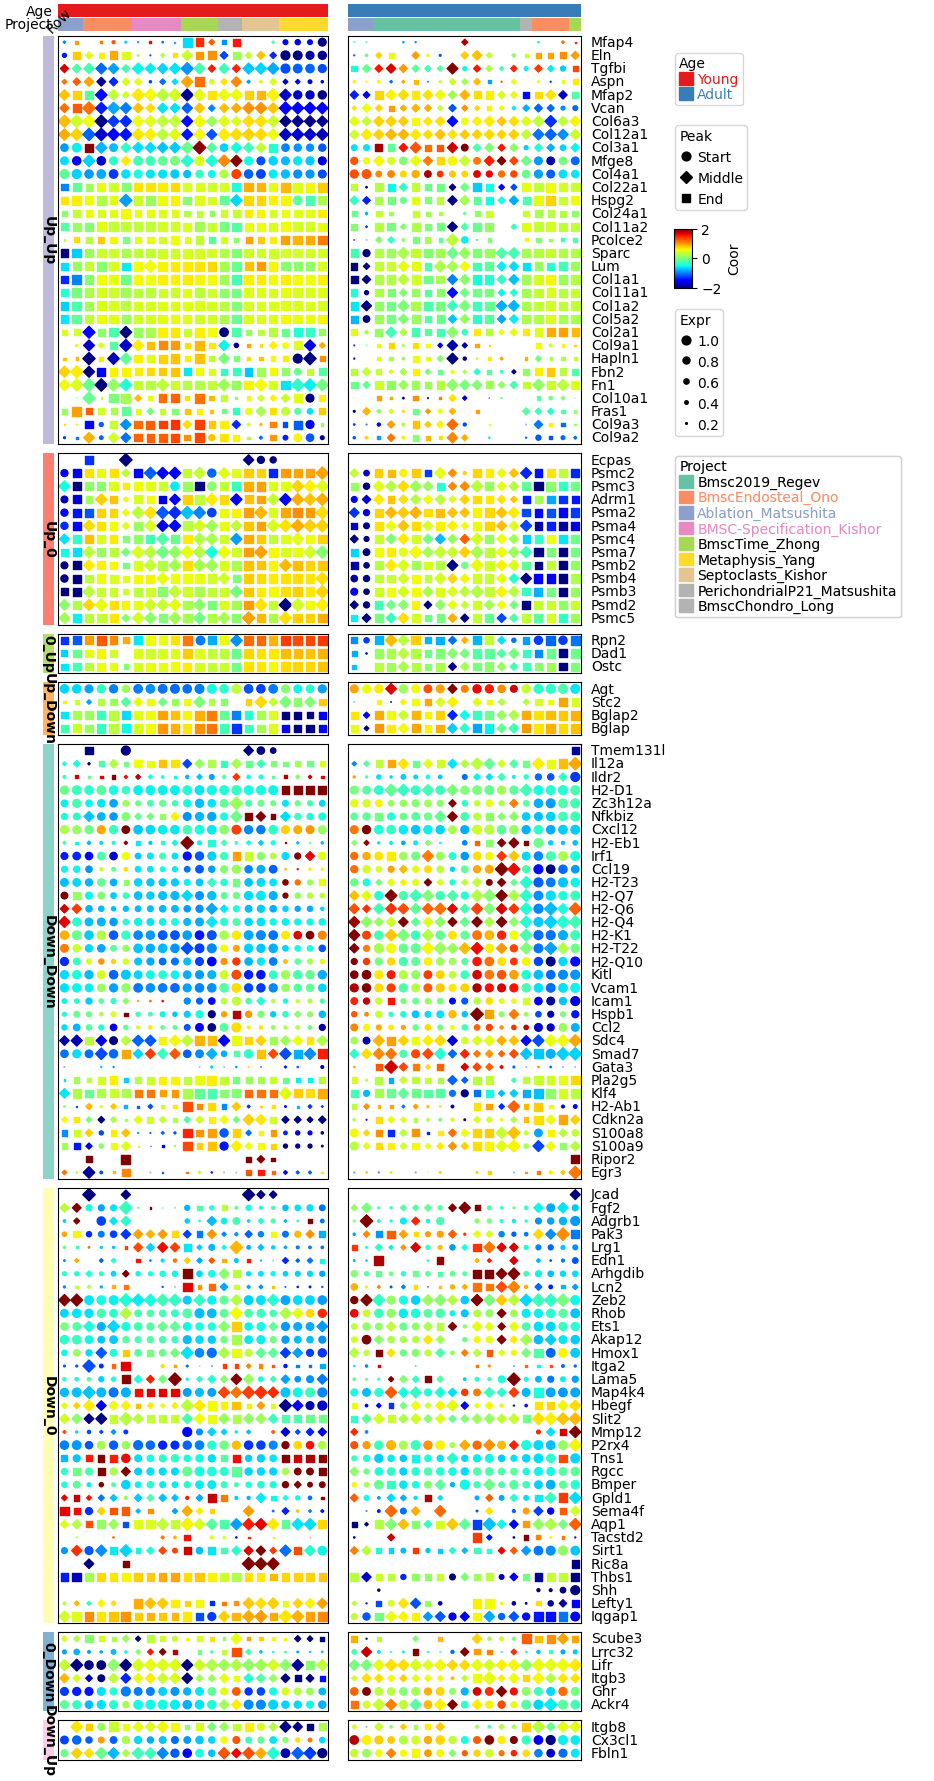

In [168]:
plt.figure(figsize=(7,20))
cm = pch.DotClustermapPlotter(geneDf,x='level_1',y='level_0',value='Coor',c='Coor',hue='Peak',s="Expr",
                              marker={'Start':'o','Middle':'D','End':'s'},row_dendrogram=False,vmax=2,vmin=-2,
                              col_split_gap=5, col_split=sampleDf2.Age,row_split=geneSum.category,
                              top_annotation=col_ha,col_cluster=False,row_split_gap=2,ratio=40,left_annotation=row_ha,
                              row_split_order=["Up_Up","Up_0","0_Up","Up_Down","Down_Down","Down_0","0_Down","Down_Up"],
                              col_split_order=["Young","Adult"],
                              show_rownames=True,show_colnames=False,spines=True)

plt.show()
